IDENTIFICACIÓN DEL TIPO DE DISTRIBUCIÓN DE VARIABLES

✓ Datos cargados correctamente
  - Ventas: 120 registros
  - Detalle ventas: 343 registros
  - Productos: 100 registros

--------------------------------------------------------------------------------
PREPARACIÓN DE VARIABLES PARA ANÁLISIS
--------------------------------------------------------------------------------

✓ Variables preparadas para análisis de distribución

--------------------------------------------------------------------------------
VARIABLES SELECCIONADAS
--------------------------------------------------------------------------------

Variables a analizar:
  1. Importe de Venta: 120 observaciones
  2. Cantidad de Productos: 120 observaciones
  3. Precio Promedio por Venta: 119 observaciones
  4. Precio Unitario de Productos: 100 observaciones

ESTADÍSTICAS DESCRIPTIVAS

Estas estadísticas nos dan pistas sobre el tipo de distribución:
- Media ≈ Mediana → Distribución simétrica
- Asimetría ≈ 0 → Distribución sim

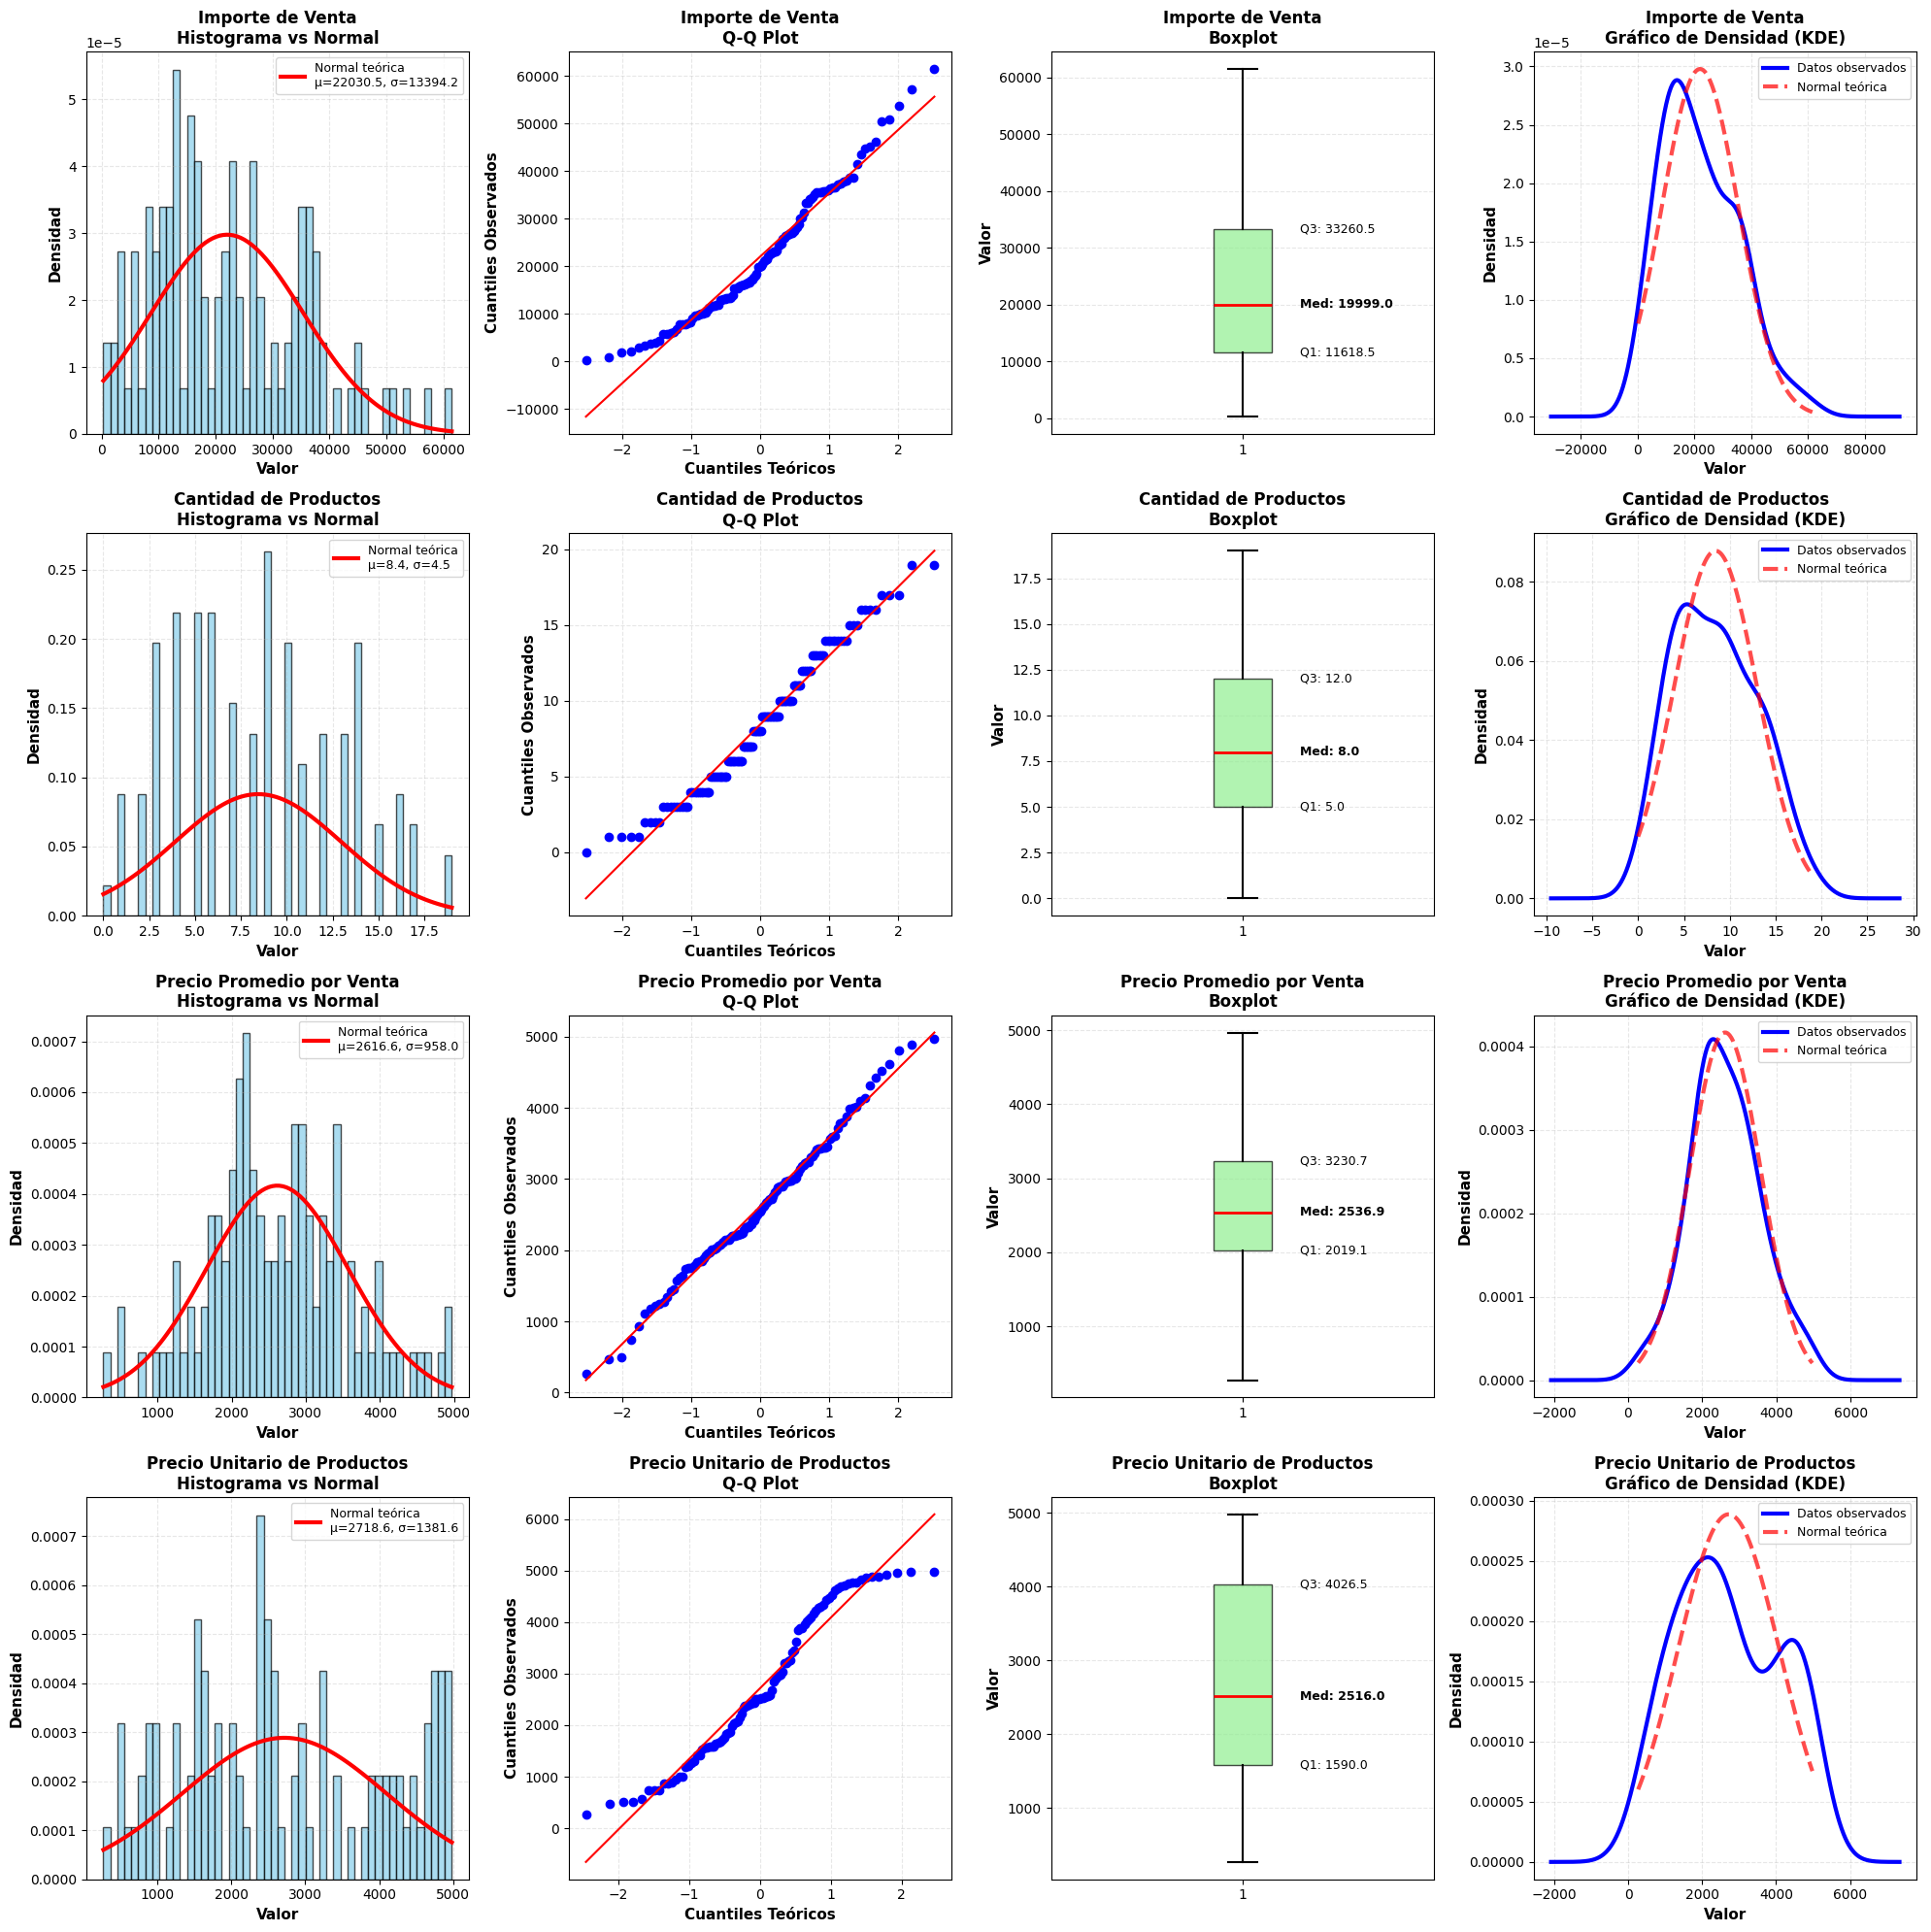


✓ Visualizaciones generadas exitosamente

CONCLUSIONES FINALES - DISTRIBUCIÓN DE VARIABLES

📊 RESUMEN EJECUTIVO:

Este análisis evaluó si las variables numéricas principales siguen una 
distribución normal, lo cual es importante para:

1. Elegir métodos estadísticos apropiados
2. Decidir entre tests paramétricos vs no paramétricos
3. Validar supuestos de modelos predictivos

🔍 INTERPRETACIÓN DE RESULTADOS:

• Si la variable ES NORMAL:
  → Usar media y desviación estándar
  → Aplicar tests paramétricos (t-test, ANOVA, correlación de Pearson)
  → Usar regresión lineal sin transformaciones

• Si la variable NO ES NORMAL:
  → Usar mediana y rango intercuartílico
  → Aplicar tests no paramétricos (Mann-Whitney, Kruskal-Wallis, Spearman)
  → Considerar transformaciones (log, raíz cuadrada) o modelos robustos

💡 RECOMENDACIONES:


✓ Importe de Venta:
  → NO sigue distribución normal
  → Usar métodos NO PARAMÉTRICOS
  → Considerar transformación logarítmica o Box-Cox

✓ Cantidad de Productos:

In [2]:
# ============================================================================
# IDENTIFICACIÓN DEL TIPO DE DISTRIBUCIÓN DE VARIABLES
# ============================================================================
# Este análisis determina si las variables siguen distribuciones normales
# o de otro tipo, lo cual es importante para elegir métodos estadísticos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro, normaltest, kstest, anderson
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")

# %% CARGA DE DATOS
print("="*80)
print("IDENTIFICACIÓN DEL TIPO DE DISTRIBUCIÓN DE VARIABLES")
print("="*80)

# Definir la ruta donde están los archivos Excel
ruta = r'C:\Users\PROBOOK\OneDrive\Desktop\Demo\Datos'

# Cargar los archivos necesarios
detalle_ventas = pd.read_excel(f'{ruta}\\Detalle_ventas.xlsx')
productos = pd.read_excel(f'{ruta}\\Productos.xlsx')
ventas = pd.read_excel(f'{ruta}\\Ventas.xlsx')

print(f"\n✓ Datos cargados correctamente")
print(f"  - Ventas: {len(ventas)} registros")
print(f"  - Detalle ventas: {len(detalle_ventas)} registros")
print(f"  - Productos: {len(productos)} registros")

# %% PREPARACIÓN DE DATOS
print("\n" + "-"*80)
print("PREPARACIÓN DE VARIABLES PARA ANÁLISIS")
print("-"*80)

# Convertir fecha a datetime
ventas['fecha'] = pd.to_datetime(ventas['fecha'])

# Unir ventas con detalle para análisis completo
ventas_detalle = ventas.merge(
    detalle_ventas.groupby('id_venta').agg({
        'importe': 'sum',
        'cantidad': 'sum'
    }).reset_index(),
    on='id_venta',
    how='left'
)

# Calcular precio promedio (sin infinitos)
ventas_detalle['precio_promedio'] = ventas_detalle['importe'] / ventas_detalle['cantidad']
ventas_detalle['precio_promedio'] = ventas_detalle['precio_promedio'].replace([np.inf, -np.inf], np.nan)

# También analizar precio unitario de productos
precio_unitario = productos['precio_unitario'].dropna()

print(f"\n✓ Variables preparadas para análisis de distribución")

# %% DEFINIR VARIABLES A ANALIZAR
print("\n" + "-"*80)
print("VARIABLES SELECCIONADAS")
print("-"*80)

# Diccionario con las variables numéricas principales y sus datos
variables_dict = {
    'Importe de Venta': ventas_detalle['importe'].dropna(),
    'Cantidad de Productos': ventas_detalle['cantidad'].dropna(),
    'Precio Promedio por Venta': ventas_detalle['precio_promedio'].dropna(),
    'Precio Unitario de Productos': precio_unitario
}

print("\nVariables a analizar:")
for i, (nombre, datos) in enumerate(variables_dict.items(), 1):
    print(f"  {i}. {nombre}: {len(datos)} observaciones")

# %% ESTADÍSTICAS DESCRIPTIVAS
print("\n" + "="*80)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("="*80)
print("\nEstas estadísticas nos dan pistas sobre el tipo de distribución:")
print("- Media ≈ Mediana → Distribución simétrica")
print("- Asimetría ≈ 0 → Distribución simétrica")
print("- Curtosis ≈ 3 → Distribución normal")
print("-"*80)

for nombre, datos in variables_dict.items():
    print(f"\n📊 {nombre.upper()}")
    print("-"*60)
    
    # Calcular estadísticas
    media = datos.mean()
    mediana = datos.median()
    moda = datos.mode()[0] if len(datos.mode()) > 0 else np.nan
    desv_std = datos.std()
    varianza = datos.var()
    minimo = datos.min()
    maximo = datos.max()
    rango = maximo - minimo
    
    # Calcular asimetría (skewness)
    # Skewness = 0: simétrica
    # Skewness > 0: cola a la derecha (asimetría positiva)
    # Skewness < 0: cola a la izquierda (asimetría negativa)
    asimetria = datos.skew()
    
    # Calcular curtosis (kurtosis)
    # Kurtosis = 3: distribución normal (mesocúrtica)
    # Kurtosis > 3: más puntiaguda que normal (leptocúrtica)
    # Kurtosis < 3: más plana que normal (platicúrtica)
    curtosis = datos.kurtosis() + 3  # scipy usa exceso de curtosis, sumamos 3
    
    # Coeficiente de variación (CV)
    # CV < 0.5: baja variabilidad
    # CV > 1: alta variabilidad
    cv = (desv_std / media) * 100 if media != 0 else np.nan
    
    print(f"  Media:               {media:,.2f}")
    print(f"  Mediana:             {mediana:,.2f}")
    print(f"  Moda:                {moda:,.2f}")
    print(f"  Desviación Estándar: {desv_std:,.2f}")
    print(f"  Varianza:            {varianza:,.2f}")
    print(f"  Mínimo:              {minimo:,.2f}")
    print(f"  Máximo:              {maximo:,.2f}")
    print(f"  Rango:               {rango:,.2f}")
    print(f"  Coef. Variación:     {cv:.2f}%")
    print(f"  Asimetría (Skew):    {asimetria:.4f}")
    print(f"  Curtosis:            {curtosis:.4f}")
    
    # Interpretación de asimetría
    print(f"\n  → Interpretación Asimetría:")
    if abs(asimetria) < 0.5:
        print(f"     Distribución SIMÉTRICA (asimetría ≈ 0)")
    elif asimetria > 0:
        print(f"     Distribución ASIMÉTRICA POSITIVA (cola hacia la derecha)")
        print(f"     → Hay valores extremos altos que jalan la media")
    else:
        print(f"     Distribución ASIMÉTRICA NEGATIVA (cola hacia la izquierda)")
        print(f"     → Hay valores extremos bajos que jalan la media")
    
    # Interpretación de curtosis
    print(f"\n  → Interpretación Curtosis:")
    if abs(curtosis - 3) < 0.5:
        print(f"     Distribución MESOCÚRTICA (similar a normal)")
    elif curtosis > 3:
        print(f"     Distribución LEPTOCÚRTICA (más puntiaguda que normal)")
        print(f"     → Datos concentrados alrededor de la media")
    else:
        print(f"     Distribución PLATICÚRTICA (más plana que normal)")
        print(f"     → Datos más dispersos")
    
    # Comparar media y mediana
    print(f"\n  → Comparación Media vs Mediana:")
    diferencia_pct = abs((media - mediana) / mediana * 100) if mediana != 0 else 0
    if diferencia_pct < 5:
        print(f"     Media ≈ Mediana (diferencia: {diferencia_pct:.1f}%)")
        print(f"     → Sugiere distribución SIMÉTRICA")
    else:
        print(f"     Media ≠ Mediana (diferencia: {diferencia_pct:.1f}%)")
        if media > mediana:
            print(f"     → Media > Mediana: Asimetría POSITIVA")
        else:
            print(f"     → Media < Mediana: Asimetría NEGATIVA")

# %% TESTS DE NORMALIDAD
print("\n" + "="*80)
print("TESTS DE NORMALIDAD")
print("="*80)
print("\nEstos tests determinan si los datos siguen una distribución normal")
print("H0 (Hipótesis Nula): Los datos siguen una distribución normal")
print("H1 (Hipótesis Alternativa): Los datos NO siguen una distribución normal")
print("\nSi p-valor < 0.05 → Rechazamos H0 → NO es normal")
print("Si p-valor ≥ 0.05 → No rechazamos H0 → Puede ser normal")
print("="*80)

# Diccionario para almacenar resultados
resultados_normalidad = {}

for nombre, datos in variables_dict.items():
    print(f"\n{'='*80}")
    print(f"📊 {nombre.upper()}")
    print('='*80)
    
    resultados_normalidad[nombre] = {}
    
    # Limitar muestra si es muy grande (algunos tests tienen límites)
    if len(datos) > 5000:
        muestra = datos.sample(5000, random_state=42)
        print(f"\n⚠️  Muestra reducida a 5000 observaciones para los tests")
    else:
        muestra = datos.copy()
    
    # -------------------------------------------------------------------------
    # TEST 1: SHAPIRO-WILK
    # -------------------------------------------------------------------------
    # Es el test más potente para muestras pequeñas (n < 5000)
    # Muy sensible a desviaciones de normalidad
    print(f"\n1️⃣  TEST DE SHAPIRO-WILK")
    print("-"*60)
    
    try:
        stat_shapiro, p_shapiro = shapiro(muestra)
        resultados_normalidad[nombre]['shapiro'] = (stat_shapiro, p_shapiro)
        
        print(f"   Estadístico W: {stat_shapiro:.6f}")
        print(f"   P-valor:       {p_shapiro:.6f}")
        
        if p_shapiro < 0.05:
            print(f"   ✗ RECHAZA normalidad (p < 0.05)")
            print(f"   → Los datos NO siguen una distribución normal")
        else:
            print(f"   ✓ NO rechaza normalidad (p ≥ 0.05)")
            print(f"   → Los datos PUEDEN seguir una distribución normal")
    except Exception as e:
        print(f"   ⚠️  No se pudo realizar el test: {e}")
        resultados_normalidad[nombre]['shapiro'] = (np.nan, np.nan)
    
    # -------------------------------------------------------------------------
    # TEST 2: KOLMOGOROV-SMIRNOV
    # -------------------------------------------------------------------------
    # Compara la distribución empírica con la distribución normal teórica
    # Funciona bien con muestras grandes
    print(f"\n2️⃣  TEST DE KOLMOGOROV-SMIRNOV")
    print("-"*60)
    
    try:
        # Estandarizar datos (media=0, std=1)
        datos_estandarizados = (muestra - muestra.mean()) / muestra.std()
        stat_ks, p_ks = kstest(datos_estandarizados, 'norm')
        resultados_normalidad[nombre]['ks'] = (stat_ks, p_ks)
        
        print(f"   Estadístico D: {stat_ks:.6f}")
        print(f"   P-valor:       {p_ks:.6f}")
        
        if p_ks < 0.05:
            print(f"   ✗ RECHAZA normalidad (p < 0.05)")
            print(f"   → Los datos NO siguen una distribución normal")
        else:
            print(f"   ✓ NO rechaza normalidad (p ≥ 0.05)")
            print(f"   → Los datos PUEDEN seguir una distribución normal")
    except Exception as e:
        print(f"   ⚠️  No se pudo realizar el test: {e}")
        resultados_normalidad[nombre]['ks'] = (np.nan, np.nan)
    
    # -------------------------------------------------------------------------
    # TEST 3: D'AGOSTINO-PEARSON
    # -------------------------------------------------------------------------
    # Combina tests de asimetría y curtosis
    # Requiere al menos 8 observaciones
    print(f"\n3️⃣  TEST DE D'AGOSTINO-PEARSON")
    print("-"*60)
    
    if len(muestra) >= 8:
        try:
            stat_dagostino, p_dagostino = normaltest(muestra)
            resultados_normalidad[nombre]['dagostino'] = (stat_dagostino, p_dagostino)
            
            print(f"   Estadístico K²: {stat_dagostino:.6f}")
            print(f"   P-valor:        {p_dagostino:.6f}")
            
            if p_dagostino < 0.05:
                print(f"   ✗ RECHAZA normalidad (p < 0.05)")
                print(f"   → Los datos NO siguen una distribución normal")
            else:
                print(f"   ✓ NO rechaza normalidad (p ≥ 0.05)")
                print(f"   → Los datos PUEDEN seguir una distribución normal")
        except Exception as e:
            print(f"   ⚠️  No se pudo realizar el test: {e}")
            resultados_normalidad[nombre]['dagostino'] = (np.nan, np.nan)
    else:
        print(f"   ⚠️  Muestra muy pequeña (n < 8)")
        resultados_normalidad[nombre]['dagostino'] = (np.nan, np.nan)
    
    # -------------------------------------------------------------------------
    # TEST 4: ANDERSON-DARLING
    # -------------------------------------------------------------------------
    # Similar a K-S pero da más peso a las colas de la distribución
    # No proporciona p-valor, sino valores críticos
    print(f"\n4️⃣  TEST DE ANDERSON-DARLING")
    print("-"*60)
    
    try:
        resultado_anderson = anderson(muestra, dist='norm')
        stat_anderson = resultado_anderson.statistic
        valores_criticos = resultado_anderson.critical_values
        niveles_significancia = resultado_anderson.significance_level
        
        print(f"   Estadístico A²: {stat_anderson:.6f}")
        print(f"\n   Valores críticos por nivel de significancia:")
        
        rechaza_normalidad = False
        for i, (nivel, valor_critico) in enumerate(zip(niveles_significancia, valores_criticos)):
            simbolo = "✗" if stat_anderson > valor_critico else "✓"
            print(f"   {simbolo} {nivel}%: {valor_critico:.3f} ", end="")
            if stat_anderson > valor_critico:
                print(f"(RECHAZA normalidad)")
                if nivel == 5.0:
                    rechaza_normalidad = True
            else:
                print(f"(NO rechaza normalidad)")
        
        if rechaza_normalidad:
            print(f"\n   → Conclusión: Los datos NO siguen distribución normal")
        else:
            print(f"\n   → Conclusión: Los datos PUEDEN seguir distribución normal")
        
        resultados_normalidad[nombre]['anderson'] = (stat_anderson, rechaza_normalidad)
    except Exception as e:
        print(f"   ⚠️  No se pudo realizar el test: {e}")
        resultados_normalidad[nombre]['anderson'] = (np.nan, False)
    
    # -------------------------------------------------------------------------
    # CONCLUSIÓN INTEGRADA
    # -------------------------------------------------------------------------
    print(f"\n{'='*60}")
    print(f"📋 CONCLUSIÓN PARA {nombre.upper()}")
    print('='*60)
    
    # Contar cuántos tests rechazan normalidad
    rechazos = 0
    tests_validos = 0
    
    if 'shapiro' in resultados_normalidad[nombre] and not np.isnan(resultados_normalidad[nombre]['shapiro'][1]):
        tests_validos += 1
        if resultados_normalidad[nombre]['shapiro'][1] < 0.05:
            rechazos += 1
    
    if 'ks' in resultados_normalidad[nombre] and not np.isnan(resultados_normalidad[nombre]['ks'][1]):
        tests_validos += 1
        if resultados_normalidad[nombre]['ks'][1] < 0.05:
            rechazos += 1
    
    if 'dagostino' in resultados_normalidad[nombre] and not np.isnan(resultados_normalidad[nombre]['dagostino'][1]):
        tests_validos += 1
        if resultados_normalidad[nombre]['dagostino'][1] < 0.05:
            rechazos += 1
    
    if 'anderson' in resultados_normalidad[nombre]:
        tests_validos += 1
        if resultados_normalidad[nombre]['anderson'][1]:
            rechazos += 1
    
    print(f"\n   Tests que RECHAZAN normalidad: {rechazos}/{tests_validos}")
    
    if rechazos == tests_validos and tests_validos > 0:
        print(f"\n   ❌ CONCLUSIÓN DEFINITIVA: NO es distribución normal")
        print(f"   → Todos los tests rechazan la hipótesis de normalidad")
        print(f"   → Usar métodos NO PARAMÉTRICOS para análisis estadístico")
    elif rechazos >= tests_validos / 2 and tests_validos > 0:
        print(f"\n   ⚠️  CONCLUSIÓN: Probablemente NO es distribución normal")
        print(f"   → La mayoría de tests rechazan normalidad")
        print(f"   → Preferir métodos NO PARAMÉTRICOS")
    elif rechazos > 0:
        print(f"\n   ⚠️  CONCLUSIÓN: Evidencia mixta sobre normalidad")
        print(f"   → Algunos tests rechazan, otros no")
        print(f"   → Revisar gráficos para decisión final")
    else:
        print(f"\n   ✅ CONCLUSIÓN: PUEDE ser distribución normal")
        print(f"   → Ningún test rechaza normalidad")
        print(f"   → Se pueden usar métodos PARAMÉTRICOS")

# %% RESUMEN DE RESULTADOS
print("\n" + "="*80)
print("TABLA RESUMEN - TESTS DE NORMALIDAD")
print("="*80)

print(f"\n{'Variable':<35} {'Shapiro':<12} {'K-S':<12} {'D\'Agostino':<12} {'Anderson':<12} {'Conclusión':<15}")
print("-"*110)

for nombre in variables_dict.keys():
    # Shapiro
    if 'shapiro' in resultados_normalidad[nombre]:
        p_shapiro = resultados_normalidad[nombre]['shapiro'][1]
        shapiro_str = f"{p_shapiro:.4f}" if not np.isnan(p_shapiro) else "N/A"
        shapiro_resultado = "✗" if (not np.isnan(p_shapiro) and p_shapiro < 0.05) else "✓" if not np.isnan(p_shapiro) else "-"
    else:
        shapiro_str = "N/A"
        shapiro_resultado = "-"
    
    # K-S
    if 'ks' in resultados_normalidad[nombre]:
        p_ks = resultados_normalidad[nombre]['ks'][1]
        ks_str = f"{p_ks:.4f}" if not np.isnan(p_ks) else "N/A"
        ks_resultado = "✗" if (not np.isnan(p_ks) and p_ks < 0.05) else "✓" if not np.isnan(p_ks) else "-"
    else:
        ks_str = "N/A"
        ks_resultado = "-"
    
    # D'Agostino
    if 'dagostino' in resultados_normalidad[nombre]:
        p_dagostino = resultados_normalidad[nombre]['dagostino'][1]
        dagostino_str = f"{p_dagostino:.4f}" if not np.isnan(p_dagostino) else "N/A"
        dagostino_resultado = "✗" if (not np.isnan(p_dagostino) and p_dagostino < 0.05) else "✓" if not np.isnan(p_dagostino) else "-"
    else:
        dagostino_str = "N/A"
        dagostino_resultado = "-"
    
    # Anderson
    if 'anderson' in resultados_normalidad[nombre]:
        anderson_rechaza = resultados_normalidad[nombre]['anderson'][1]
        anderson_resultado = "✗" if anderson_rechaza else "✓"
    else:
        anderson_resultado = "-"
    
    # Conclusión general
    rechazos = [shapiro_resultado, ks_resultado, dagostino_resultado, anderson_resultado].count("✗")
    if rechazos >= 3:
        conclusion = "NO Normal"
    elif rechazos >= 2:
        conclusion = "Dudoso"
    elif rechazos == 1:
        conclusion = "Revisar"
    else:
        conclusion = "Normal"
    
    print(f"{nombre:<35} {shapiro_resultado} {shapiro_str:<10} {ks_resultado} {ks_str:<10} {dagostino_resultado} {dagostino_str:<10} {anderson_resultado:<12} {conclusion:<15}")

print("-"*110)
print("\nLeyenda: ✓ = No rechaza normalidad | ✗ = Rechaza normalidad | - = No aplicable")

# %% VISUALIZACIONES
print("\n" + "="*80)
print("GENERANDO VISUALIZACIONES")
print("="*80)

# Crear figura con subplots para cada variable
n_variables = len(variables_dict)
fig = plt.figure(figsize=(20, 5*n_variables))

for idx, (nombre, datos) in enumerate(variables_dict.items(), 1):
    
    # Tomar muestra si hay muchos datos
    if len(datos) > 5000:
        muestra_plot = datos.sample(5000, random_state=42)
    else:
        muestra_plot = datos.copy()
    
    # -------------------------------------------------------------------------
    # Gráfico 1: Histograma con curva normal superpuesta
    # -------------------------------------------------------------------------
    plt.subplot(n_variables, 4, (idx-1)*4 + 1)
    
    # Histograma
    n, bins, patches = plt.hist(muestra_plot, bins=50, density=True, 
                                 alpha=0.7, color='skyblue', edgecolor='black')
    
    # Curva normal teórica
    mu = muestra_plot.mean()
    sigma = muestra_plot.std()
    x = np.linspace(muestra_plot.min(), muestra_plot.max(), 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=3, 
             label=f'Normal teórica\nμ={mu:.1f}, σ={sigma:.1f}')
    
    plt.xlabel('Valor', fontsize=11, fontweight='bold')
    plt.ylabel('Densidad', fontsize=11, fontweight='bold')
    plt.title(f'{nombre}\nHistograma vs Normal', fontsize=12, fontweight='bold')
    plt.legend(fontsize=9)
    plt.grid(alpha=0.3, linestyle='--')
    
    # -------------------------------------------------------------------------
    # Gráfico 2: Q-Q Plot (Quantile-Quantile)
    # -------------------------------------------------------------------------
    # Compara cuantiles de los datos con cuantiles de distribución normal
    # Si los puntos están sobre la línea roja → distribución normal
    plt.subplot(n_variables, 4, (idx-1)*4 + 2)
    
    stats.probplot(muestra_plot, dist="norm", plot=plt)
    plt.title(f'{nombre}\nQ-Q Plot', fontsize=12, fontweight='bold')
    plt.xlabel('Cuantiles Teóricos', fontsize=11, fontweight='bold')
    plt.ylabel('Cuantiles Observados', fontsize=11, fontweight='bold')
    plt.grid(alpha=0.3, linestyle='--')
    
    # -------------------------------------------------------------------------
    # Gráfico 3: Boxplot
    # -------------------------------------------------------------------------
    # Muestra mediana, cuartiles y valores atípicos
    plt.subplot(n_variables, 4, (idx-1)*4 + 3)
    
    bp = plt.boxplot(muestra_plot, vert=True, patch_artist=True,
                     boxprops=dict(facecolor='lightgreen', alpha=0.7),
                     medianprops=dict(color='red', linewidth=2),
                     whiskerprops=dict(linewidth=1.5),
                     capprops=dict(linewidth=1.5))
    
    plt.ylabel('Valor', fontsize=11, fontweight='bold')
    plt.title(f'{nombre}\nBoxplot', fontsize=12, fontweight='bold')
    plt.grid(alpha=0.3, linestyle='--', axis='y')
    
    # Agregar estadísticas
    q1 = muestra_plot.quantile(0.25)
    q2 = muestra_plot.median()
    q3 = muestra_plot.quantile(0.75)
    plt.text(1.15, q1, f'Q1: {q1:.1f}', fontsize=9, va='center')
    plt.text(1.15, q2, f'Med: {q2:.1f}', fontsize=9, va='center', fontweight='bold')
    plt.text(1.15, q3, f'Q3: {q3:.1f}', fontsize=9, va='center')
    
    # -------------------------------------------------------------------------
    # Gráfico 4: Gráfico de densidad (KDE)
    # -------------------------------------------------------------------------
    # Estimación suave de la distribución
    plt.subplot(n_variables, 4, (idx-1)*4 + 4)
    
    # KDE de los datos
    muestra_plot.plot(kind='density', color='blue', linewidth=3, label='Datos observados')
    
    # Distribución normal teórica
    x = np.linspace(muestra_plot.min(), muestra_plot.max(), 100)
    plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r--', linewidth=3, 
             label='Normal teórica', alpha=0.7)
    
    plt.xlabel('Valor', fontsize=11, fontweight='bold')
    plt.ylabel('Densidad', fontsize=11, fontweight='bold')
    plt.title(f'{nombre}\nGráfico de Densidad (KDE)', fontsize=12, fontweight='bold')
    plt.legend(fontsize=9)
    plt.grid(alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('analisis_distribucion_variables.png', dpi=300, bbox_inches='tight')
print("\n✓ Gráfico guardado: analisis_distribucion_variables.png")
plt.show()

print("\n✓ Visualizaciones generadas exitosamente")

# %% CONCLUSIONES FINALES
print("\n" + "="*80)
print("CONCLUSIONES FINALES - DISTRIBUCIÓN DE VARIABLES")
print("="*80)

print("""
📊 RESUMEN EJECUTIVO:

Este análisis evaluó si las variables numéricas principales siguen una 
distribución normal, lo cual es importante para:

1. Elegir métodos estadísticos apropiados
2. Decidir entre tests paramétricos vs no paramétricos
3. Validar supuestos de modelos predictivos

🔍 INTERPRETACIÓN DE RESULTADOS:

• Si la variable ES NORMAL:
  → Usar media y desviación estándar
  → Aplicar tests paramétricos (t-test, ANOVA, correlación de Pearson)
  → Usar regresión lineal sin transformaciones

• Si la variable NO ES NORMAL:
  → Usar mediana y rango intercuartílico
  → Aplicar tests no paramétricos (Mann-Whitney, Kruskal-Wallis, Spearman)
  → Considerar transformaciones (log, raíz cuadrada) o modelos robustos

💡 RECOMENDACIONES:

""")

for nombre in variables_dict.keys():
    rechazos = 0
    tests_validos = 0
    
    if 'shapiro' in resultados_normalidad[nombre] and not np.isnan(resultados_normalidad[nombre]['shapiro'][1]):
        tests_validos += 1
        if resultados_normalidad[nombre]['shapiro'][1] < 0.05:
            rechazos += 1
    if 'ks' in resultados_normalidad[nombre] and not np.isnan(resultados_normalidad[nombre]['ks'][1]):
        tests_validos += 1
        if resultados_normalidad[nombre]['ks'][1] < 0.05:
            rechazos += 1
    if 'dagostino' in resultados_normalidad[nombre] and not np.isnan(resultados_normalidad[nombre]['dagostino'][1]):
        tests_validos += 1
        if resultados_normalidad[nombre]['dagostino'][1] < 0.05:
            rechazos += 1
    if 'anderson' in resultados_normalidad[nombre]:
        tests_validos += 1
        if resultados_normalidad[nombre]['anderson'][1]:
            rechazos += 1
    
    print(f"✓ {nombre}:")
    if rechazos >= 3:
        print(f"  → NO sigue distribución normal")
        print(f"  → Usar métodos NO PARAMÉTRICOS")
        print(f"  → Considerar transformación logarítmica o Box-Cox")
    elif rechazos >= 2:
        print(f"  → Probablemente NO es normal")
        print(f"  → Preferir métodos NO PARAMÉTRICOS por seguridad")
    else:
        print(f"  → PUEDE considerarse normal")
        print(f"  → Se pueden usar métodos PARAMÉTRICOS")
    print()

print("="*80)
print("ANÁLISIS COMPLETADO EXITOSAMENTE")
print("="*80)
print("\n📁 Archivo generado:")
print("   - analisis_distribucion_variables.png")
print("\n📊 Revisa el gráfico Q-Q Plot para validar visualmente la normalidad")
print("   Si los puntos están sobre la línea roja → distribución normal")
print("   Si se desvían de la línea → NO es normal")